# Notebook

##imports

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

##getting the data from Kaggle
steps:
1. Download kaggle.json from kaggle and upload it
2. Install kaggle
3. Create directory named kaggle and copy the json file inside this folder
4. Download both datasets and unzip the folder

In [ ]:
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

imdb-dataset-of-top-1000-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
replace imdb_top_1000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!kaggle datasets download -d narayan63/netflix-popular-movies-dataset

netflix-popular-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip netflix-popular-movies-dataset.zip

Archive:  netflix-popular-movies-dataset.zip
replace n_movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Read Data

In [483]:
Netflix_df=pd.read_csv("n_movies.csv")
Imdb_df=pd.read_csv("imdb_top_1000.csv")

In [484]:
Netflix_df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [485]:
Imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


##Make the Imdb columns with the same name and remove non-sense columns

In [486]:
Imdb_df=Imdb_df.drop(columns='Poster_Link')
Imdb_df=Imdb_df.drop(columns='Gross')
Imdb_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


In [487]:
Imdb_df.loc[:,'Star1']=Imdb_df.loc[:,'Star1'].apply(lambda x :[x])
Imdb_df.loc[:,'Star2']=Imdb_df.loc[:,'Star2'].apply(lambda x :[x])
Imdb_df.loc[:,'Star3']=Imdb_df.loc[:,'Star3'].apply(lambda x :[x])
Imdb_df.loc[:,'Star4']=Imdb_df.loc[:,'Star4'].apply(lambda x :[x])
Imdb_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,[Tim Robbins],[Morgan Freeman],[Bob Gunton],[William Sadler],2343110
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,[Marlon Brando],[Al Pacino],[James Caan],[Diane Keaton],1620367
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,[Christian Bale],[Heath Ledger],[Aaron Eckhart],[Michael Caine],2303232
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,[Al Pacino],[Robert De Niro],[Robert Duvall],[Diane Keaton],1129952
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,[Henry Fonda],[Lee J. Cobb],[Martin Balsam],[John Fiedler],689845


In [488]:
Imdb_df["stars"]=Imdb_df['Star1']+Imdb_df['Star2']+Imdb_df['Star3']+Imdb_df['Star4']
Imdb_df=Imdb_df.drop(columns=['Star1','Star2','Star3','Star4'])


Director can be added to stars?
I dont know what is Meta Score

 @Borno check this

In [489]:
Imdb_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,stars
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,2343110,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,1620367,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,2303232,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,1129952,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,689845,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,166544,"[Audrey Hepburn, George Peppard, Patricia Neal..."
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,34075,"[Elizabeth Taylor, Rock Hudson, James Dean, Ca..."
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,43374,"[Burt Lancaster, Montgomery Clift, Deborah Ker..."
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,26471,"[Tallulah Bankhead, John Hodiak, Walter Slezak..."


## EDA & Preprocess for IMDB data

1. Distribution of ratings
2. Popular Genres
3. Directs & Stars

In [490]:
Imdb_df.shape

(1000, 11)

In [491]:
Imdb_df.drop_duplicates(subset=["Series_Title"])

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,stars
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,2343110,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,1620367,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,2303232,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,1129952,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,689845,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,166544,"[Audrey Hepburn, George Peppard, Patricia Neal..."
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,34075,"[Elizabeth Taylor, Rock Hudson, James Dean, Ca..."
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,43374,"[Burt Lancaster, Montgomery Clift, Deborah Ker..."
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,26471,"[Tallulah Bankhead, John Hodiak, Walter Slezak..."


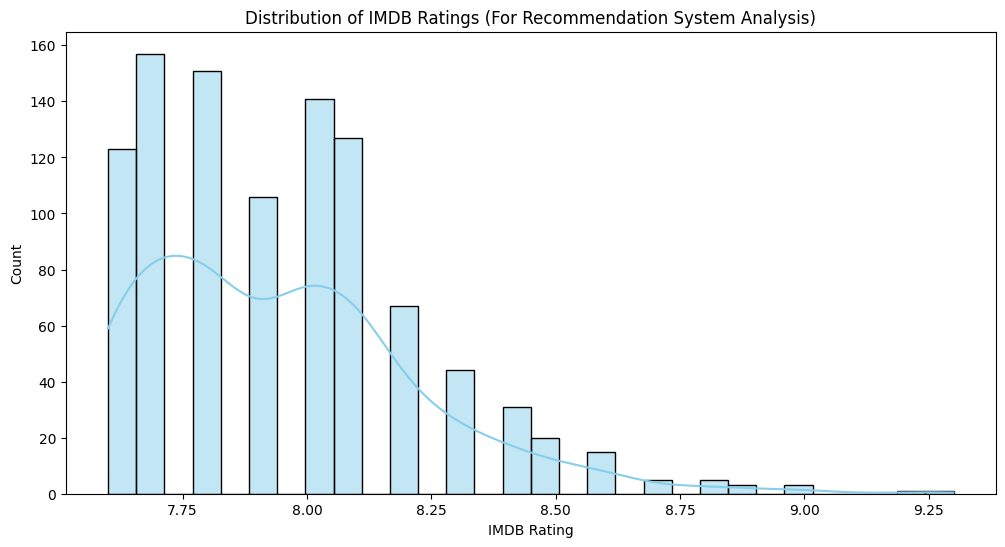

In [492]:
plt.figure(figsize=(12, 6))
sns.histplot(Imdb_df['IMDB_Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings (For Recommendation System Analysis)')
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.show()

* Majority of movies ratings between **7 - 8.5**
* Only few movies with high ratings.


Next lets check **2.** distribution of genres

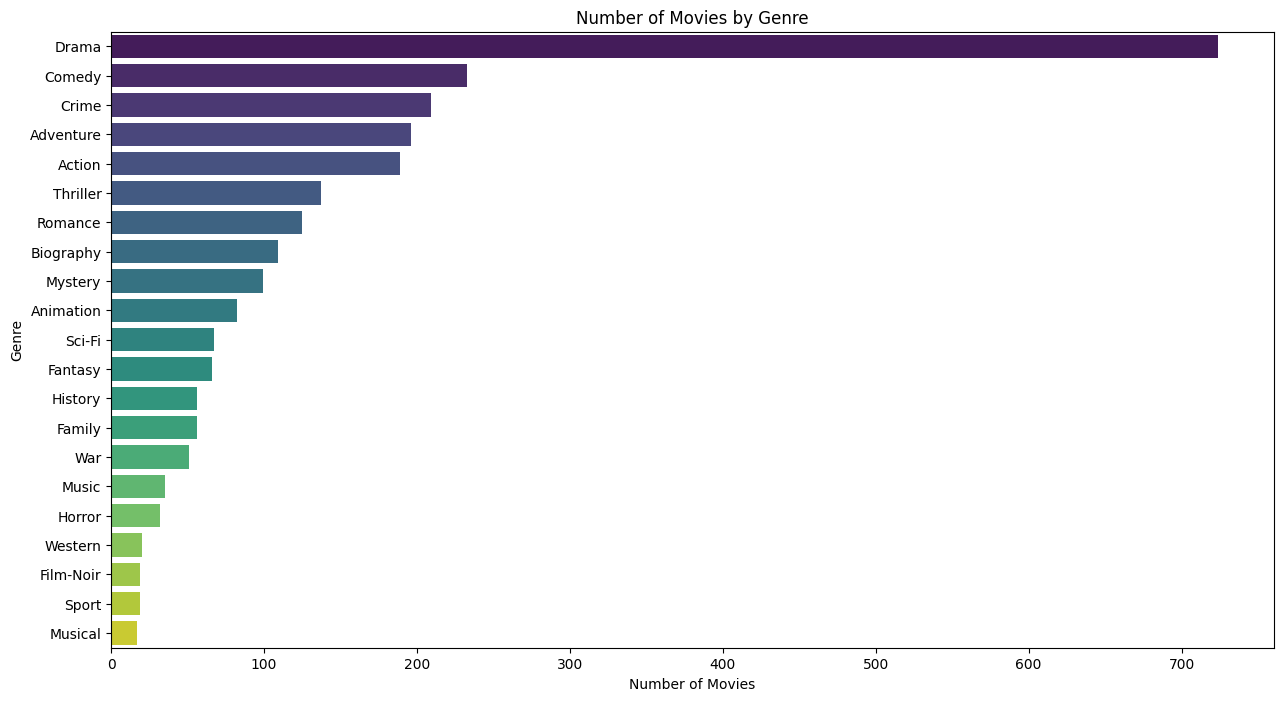

In [493]:
genre_counts = Imdb_df['Genre'].str.split(', ').explode().value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="viridis")
plt.title('Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


* **Drama** is the most prevalent genre? Maybe too significant? Bias? Nvm Multiple genres can be inserted to a movie lol

* Crime, Action, Comedy, Adventure also popular

* Genres like sport, western and music less frequent.


Next lets check the most frequent directors & stars. Lets visualize top 10 directiors based on the number of movies they have in dataset.

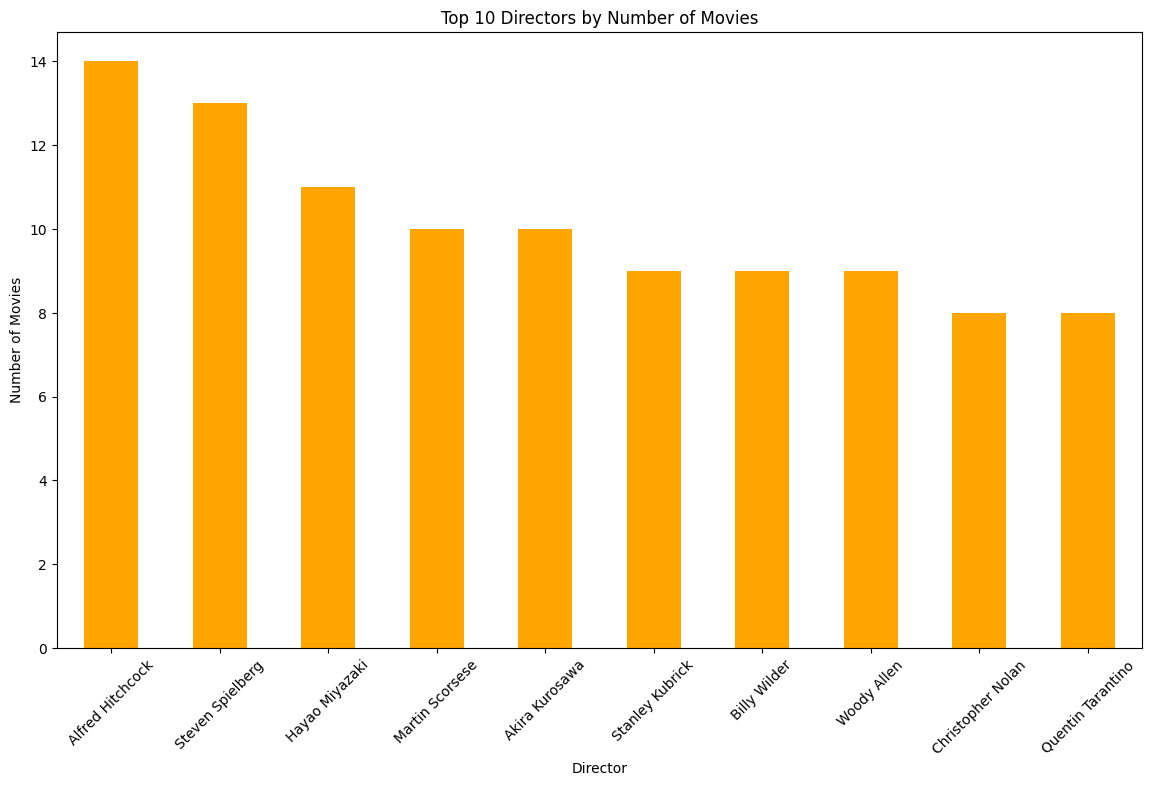

In [494]:
directors = Imdb_df['Director'].value_counts().head(10)
plt.figure(figsize=(14, 8))
directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Alfred Hitchcock, Steven Spielberg most frequent directors.

Lets also check number of movies released over the years

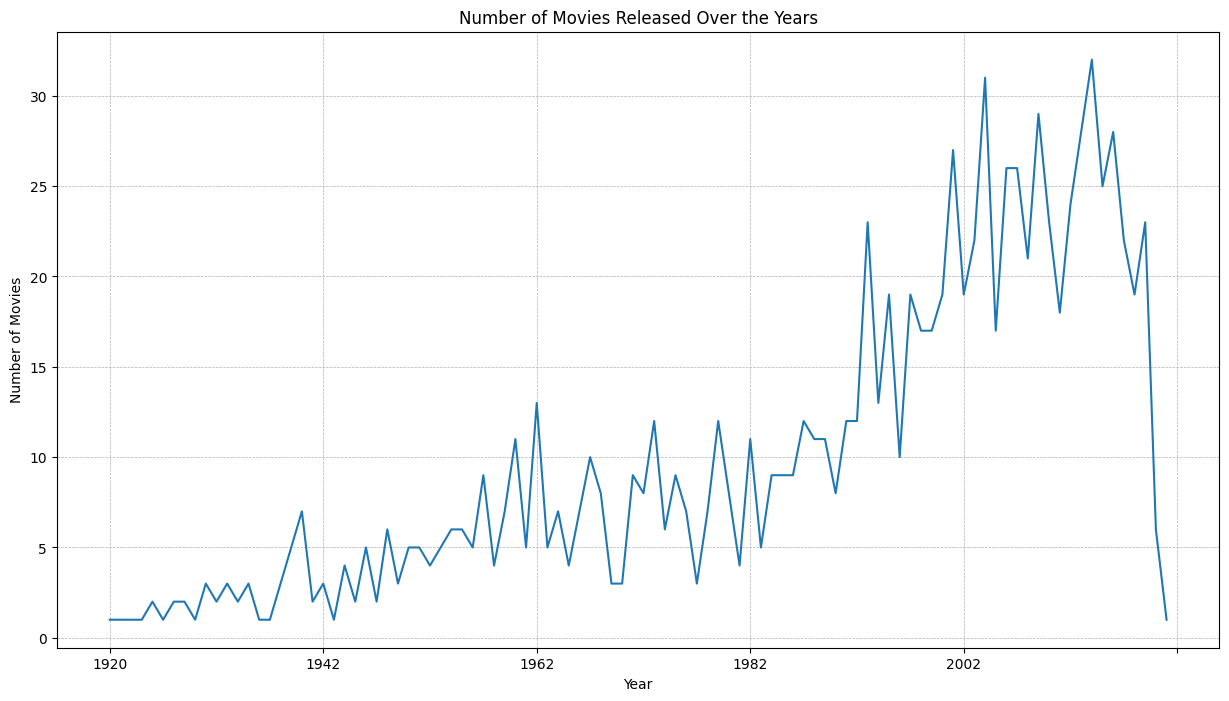

In [495]:
plt.figure(figsize=(15, 8))
Imdb_df['Released_Year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**Upward trend** in the num of movies from 20th century till now. Indicated an increase in film production over the years. The dataset contains mix of both **old** and **newer** movies --> can be may used if user prefers **older** movies?

Lets move on to **preprocessing**

In [496]:
missing_data = Imdb_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (Imdb_df.isnull().sum() / len(Imdb_df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage (%)
Meta_score,157,15.7
Certificate,101,10.1


Seems like we can preprocess the missing values of the meta_score by **median** of the whole column. Since its **only 15%**. For certificate put a placeholder value.

In [497]:
Imdb_df['Meta_score'].fillna(Imdb_df['Meta_score'].median(), inplace=True)
Imdb_df['Certificate'].fillna('Not Specified', inplace=True)
remaining_missing = Imdb_df.isnull().sum().max()
remaining_missing

0

I noticed **Released_Year** column has "**PG**" values for somereason? Might be a data misalignment? Maybe data got shifted and the certificate "PG" ended up in the year column?



In [498]:
pg_issue_rows = Imdb_df[Imdb_df['Released_Year'] == 'PG']
print(pg_issue_rows[['Series_Title', 'Released_Year', 'Certificate']])

    Series_Title Released_Year Certificate
966    Apollo 13            PG           U


In [499]:
Imdb_df.loc[Imdb_df['Released_Year'] == 'PG', 'Certificate'] = 'PG'
median_year = Imdb_df[Imdb_df['Released_Year'] != 'PG']['Released_Year'].astype(int).median()
Imdb_df.loc[Imdb_df['Released_Year'] == 'PG', 'Released_Year'] = median_year

remaining_pg_rows = Imdb_df[Imdb_df['Released_Year'] == 'PG']
print(remaining_pg_rows[['Series_Title', 'Released_Year', 'Certificate']])

Empty DataFrame
Columns: [Series_Title, Released_Year, Certificate]
Index: []


Lets keep **preprocessing** data next we runtime from **xxx min** --> float

In [500]:
Imdb_df['Runtime'] = Imdb_df['Runtime'].str.extract('(\d+)').astype(float)
Imdb_df['Runtime']

0      142.0
1      175.0
2      152.0
3      202.0
4       96.0
       ...  
995    115.0
996    201.0
997    118.0
998     97.0
999     86.0
Name: Runtime, Length: 1000, dtype: float64

##EDA and Processing for Netflix data

###EDA

1. checked the top 10 movies
2. knew that many movies are dublicates
3. also the genre column

In [501]:
Netflix_df.shape

(9957, 9)

We need to remove duplicates in order to understand the data well

In [502]:
Netflix_df=Netflix_df.drop_duplicates(subset=["title"])
Netflix_df.shape

(7912, 9)

In [503]:
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7912 entries, 0 to 9912
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        7912 non-null   object 
 1   year         7410 non-null   object 
 2   certificate  4737 non-null   object 
 3   duration     6459 non-null   object 
 4   genre        7848 non-null   object 
 5   rating       6872 non-null   float64
 6   description  7912 non-null   object 
 7   stars        7912 non-null   object 
 8   votes        6872 non-null   object 
dtypes: float64(1), object(8)
memory usage: 618.1+ KB


####Check the Top 10 rated movies

In [504]:
Top10Movies=Netflix_df.sort_values("rating",ascending=False).head(10)

In [505]:
Top10Movies.head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,340"
4826,Story Time Book: Read-Along,(2022– ),NaN,NaN,Animation,9.4,Kids can read along with illustrated books tha...,"['Lileina Joy, ', 'Maya Aoki Tuttle, ', 'Emily...",16
3322,Elesin Oba: The King's Horseman,(2022),NaN,96 min,"Adventure, Drama, History",9.4,"Inspired by true life events, in the Oyo Empir...","['Biyi Bandele', '| ', ' Stars:', 'Odunlade...",72
193,Avatar: The Last Airbender,(2005–2008),TV-Y7-FV,23 min,"Animation, Action, Adventure",9.3,"In a war-torn world of elemental magic, a youn...","['Dee Bradley Baker, ', 'Zach Tyler Eisen, ', ...","309,241"
1406,Our Planet,(2019),TV-G,403 min,Documentary,9.3,Documentary series focusing on the breadth of ...,['David Attenborough'],"43,175"
793,Cosmos: A Spacetime Odyssey,(2014),TV-PG,557 min,Documentary,9.3,An exploration of our discovery of the laws of...,"['Neil deGrasse Tyson, ', 'Christopher Emerson...","121,400"
6,Rick and Morty,(2013– ),TV-MA,23 min,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...","502,160"
1209,Reply 1988,(2015–2016),NaN,90 min,"Comedy, Drama, Family",9.2,Follows the lives of 5 families living on the ...,"['Hyeri Lee, ', 'Go Kyung-Pyo, ', 'Ryu Jun-Yeo...","7,286"
634,The Last Dance,(2020),TV-MA,491 min,"Documentary, Biography, History",9.1,"Charting the rise of the 1990s Chicago Bulls, ...","['Michael Jordan, ', 'Phil Jackson, ', 'Scotti...","119,768"


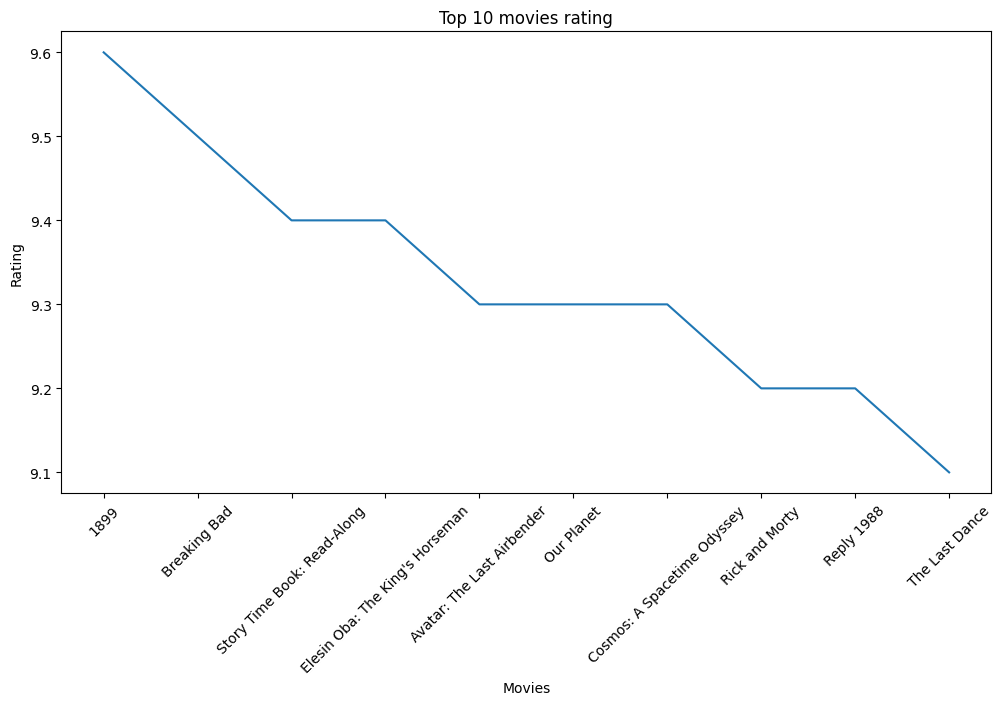

In [506]:
plt.figure(figsize=(12, 6))
plt.plot(Top10Movies['title'],Top10Movies['rating'])
plt.title('Top 10 movies rating')
plt.xlabel('Movies')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Genres

In [507]:
Netflix_df["genre"].value_counts()

Comedy                          768
Drama                           490
Documentary                     462
Animation, Action, Adventure    263
Comedy, Drama                   218
                               ... 
Comedy, Horror, Sci-Fi            1
Biography, Music                  1
Short, Action, Romance            1
Animation, Action, History        1
News, Reality-TV                  1
Name: genre, Length: 566, dtype: int64

In [508]:
genre_counts_Net=Netflix_df["genre"].str.split(',').explode().value_counts()

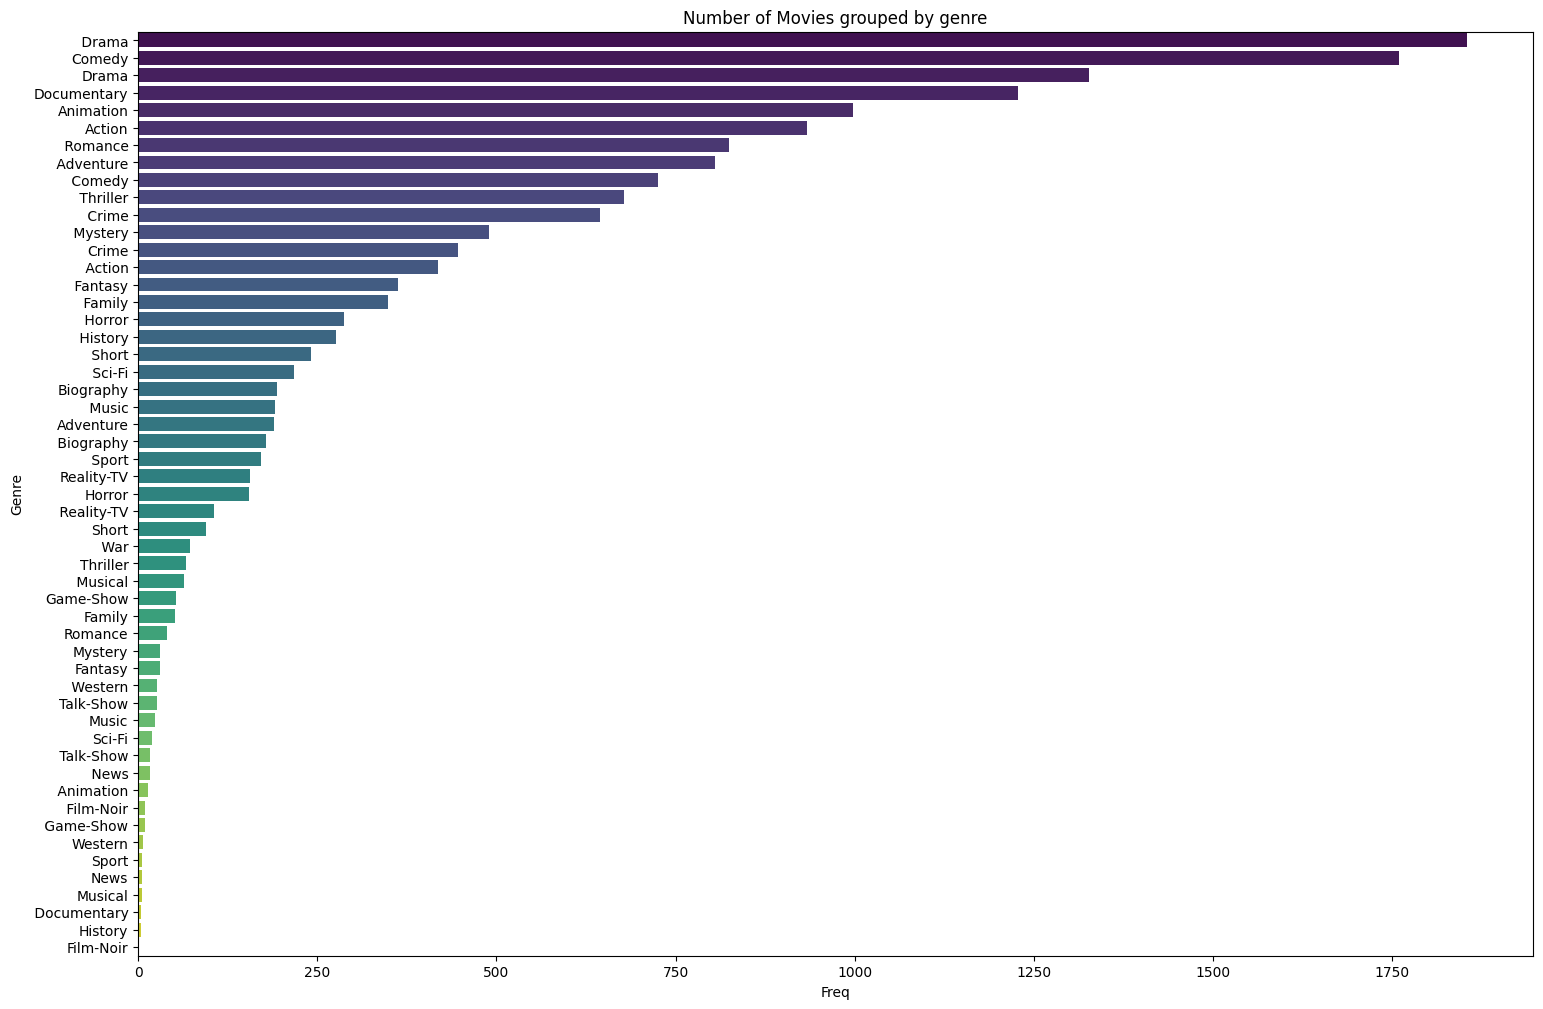

In [509]:
plt.figure(figsize=(18,12))

sns.barplot(y=genre_counts_Net.index, x=genre_counts_Net.values, palette="viridis")
plt.title('Number of Movies grouped by genre')
plt.xlabel('Freq')
plt.ylabel('Genre')
plt.show()

###Processing by coverting object cols to numeric if needed



**I will take the first year and label it with Released_Year (same as the IMDB dataset)**

In [510]:
Netflix_df.loc[0:10,['year','title']]

,year,title
0,(2018– ),Cobra Kai
1,(2016– ),The Crown
2,(2015–2022),Better Call Saul
3,(2022),Devil in Ohio
4,(2022– ),Cyberpunk: Edgerunners
5,(2022– ),The Sandman
6,(2013– ),Rick and Morty
7,(2008–2013),Breaking Bad
8,(2022– ),The Imperfects
9,(2022),Blonde


In [511]:
Netflix_df['Released_Year']=Netflix_df['year'].str.extract('([0-9]+)').astype(float)
Netflix_df=Netflix_df.drop(columns='year')
Netflix_df.head(12)

,title,certificate,duration,genre,rating,description,stars,votes,Released_Year
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0
5,The Sandman,TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358",2022.0
6,Rick and Morty,TV-MA,23 min,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...","502,160",2013.0
7,Breaking Bad,TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,340",2008.0
8,The Imperfects,TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,123",2022.0
9,Blonde,NC-17,166 min,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935,2022.0


**We need to convert duration column to duration_in_min Column**

In [512]:
Netflix_df.loc[0:10,['duration','title']]

,duration,title
0,30 min,Cobra Kai
1,58 min,The Crown
2,46 min,Better Call Saul
3,356 min,Devil in Ohio
4,24 min,Cyberpunk: Edgerunners
5,45 min,The Sandman
6,23 min,Rick and Morty
7,49 min,Breaking Bad
8,45 min,The Imperfects
9,166 min,Blonde


In [513]:
Netflix_df['duration_in_min']=duration_in_min=Netflix_df['duration'].str.extract('([0-9]+)').astype(float)
Netflix_df=Netflix_df.drop(columns='duration')
Netflix_df.head(11)

,title,certificate,genre,rating,description,stars,votes,Released_Year,duration_in_min
0,Cobra Kai,TV-14,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018.0,30.0
1,The Crown,TV-MA,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016.0,58.0
2,Better Call Saul,TV-MA,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015.0,46.0
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022.0,356.0
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022.0,24.0
5,The Sandman,TV-MA,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358",2022.0,45.0
6,Rick and Morty,TV-MA,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...","502,160",2013.0,23.0
7,Breaking Bad,TV-MA,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,340",2008.0,49.0
8,The Imperfects,TV-MA,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,123",2022.0,45.0
9,Blonde,NC-17,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935,2022.0,166.0


The votes columns is not float. so I converted the column into numeric value

In [514]:
Netflix_df.loc[0:10,['votes','title']]

,votes,title
0,"177,031",Cobra Kai
1,"199,885",The Crown
2,"501,384",Better Call Saul
3,"9,773",Devil in Ohio
4,"15,413",Cyberpunk: Edgerunners
5,"116,358",The Sandman
6,"502,160",Rick and Morty
7,"1,831,340",Breaking Bad
8,"3,123",The Imperfects
9,935,Blonde


In [515]:
Netflix_df['votes']=duration_in_min=Netflix_df['votes'].str.replace(',','').astype('float')
Netflix_df.head(10)

,title,certificate,genre,rating,description,stars,votes,Released_Year,duration_in_min
0,Cobra Kai,TV-14,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,2018.0,30.0
1,The Crown,TV-MA,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,2016.0,58.0
2,Better Call Saul,TV-MA,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,2015.0,46.0
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,2022.0,356.0
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,2022.0,24.0
5,The Sandman,TV-MA,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0,2022.0,45.0
6,Rick and Morty,TV-MA,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160.0,2013.0,23.0
7,Breaking Bad,TV-MA,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340.0,2008.0,49.0
8,The Imperfects,TV-MA,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3123.0,2022.0,45.0
9,Blonde,NC-17,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935.0,2022.0,166.0


In [516]:
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7912 entries, 0 to 9912
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            7912 non-null   object 
 1   certificate      4737 non-null   object 
 2   genre            7848 non-null   object 
 3   rating           6872 non-null   float64
 4   description      7912 non-null   object 
 5   stars            7912 non-null   object 
 6   votes            6872 non-null   float64
 7   Released_Year    7318 non-null   float64
 8   duration_in_min  6459 non-null   float64
dtypes: float64(4), object(5)
memory usage: 876.2+ KB


###Processing by checking missing data
My first plan is to check for the movies in the other dataset so that is a way to combine both dataset by checking the missed data in the the other dataset.

Note: many cols in IMDB does not have any missing data (such as rating)

#### check the missing data in both datasets

In [517]:
missing_Net=Netflix_df.isnull().sum()
percenetage_Net=(Netflix_df.isnull().sum()/len(Netflix_df))*100

missing_IMDB=Imdb_df.isnull().sum()
percenetage_IMDB=(Imdb_df.isnull().sum()/len(Imdb_df))*100

missing_data_Net = pd.DataFrame({'Missing Values Netflix': missing_Net, 'Percentage (%) Netflix': percenetage_Net})
missing_data_Imdb=pd.DataFrame({'Missing Values IMDB': missing_IMDB, 'Percentage (%) IMDB' : percenetage_IMDB})

missing_data_Net[missing_data_Net['Missing Values Netflix']>0]

,Missing Values Netflix,Percentage (%) Netflix
certificate,3175,40.128918
genre,64,0.808898
rating,1040,13.144590
votes,1040,13.144590
Released_Year,594,7.507583
duration_in_min,1453,18.364510


In [518]:
print(Imdb_df.columns)
missing_data_Imdb[missing_data_Imdb['Missing Values IMDB']>0]


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'stars'],
      dtype='object')


,Missing Values IMDB,Percentage (%) IMDB


#### let's investigate the idea of getting the missing data from imdb dataset. Let's start by rating column

remove any row that contains a movie exists in imdb

In [519]:
print('Before dropping dublicates that are found in imdb dataset =',Netflix_df.shape)
imdb_titles=Imdb_df.Series_Title

Netflix_df=Netflix_df[~Netflix_df['title'].isin(imdb_titles)]
print('After = ',Netflix_df.shape)

Before dropping dublicates that are found in imdb dataset = (7912, 9)
After =  (7815, 9)


Let's see what are the missing data after removing all the titles that are not in imdb

In [520]:
missing_Net=Netflix_df.isnull().sum()
percenetage_Net=(Netflix_df.isnull().sum()/len(Netflix_df))*100


missing_data_Net = pd.DataFrame({'Missing Values Netflix': missing_Net, 'Percentage (%) Netflix': percenetage_Net})
missing_data_Net[missing_data_Net['Missing Values Netflix']>0]

,Missing Values Netflix,Percentage (%) Netflix
certificate,3160,40.435061
genre,63,0.806142
rating,1030,13.179782
votes,1030,13.179782
Released_Year,586,7.498401
duration_in_min,1441,18.438900


**Conclusion**: No many common movies in the datasets.
We need to handle the missing data in other ways.

The problem is that the missing data are huge. Not sure if we can replace it with mean or median.

for example if we gave duration which was not accurate then we will assume wrong things while predicting?

###Processing Certificates (NOt done yet)

**Certificates** can be very benefial to understand the user more.

For example MA: means MA - 15+ Restricted (Under 15 only with an adult)
Link:[Certificates meanings](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#)

In [ ]:
Netflix_df.loc[0:10,['certificate','title']]

,certificate,title
0,TV-14,Cobra Kai
1,TV-MA,The Crown
2,TV-MA,Better Call Saul
3,TV-MA,Devil in Ohio
4,TV-MA,Cyberpunk: Edgerunners
5,TV-MA,The Sandman
6,TV-MA,Rick and Morty
7,TV-MA,Breaking Bad
8,TV-MA,The Imperfects
9,NC-17,Blonde


We can use the description column to get keywords for search engine (not sure how this can be benefial in the model)